#  **Segmenting Agricultural Lands**




# 📋 **Business Objective Understanding**

## 🎯 **1 .Objective:**
To segment agricultural lands in Tunisia for agricultural businesses, enabling better decision-making for investment, development, and utilization of these lands.

---

### ❓ **Key Questions to Address:**
- 📌 **What are the key factors influencing land prices?**  
- 📌 **How can we categorize lands based on their features (e.g., proximity to the sea, infrastructure, type of agriculture)?**  
- 📌 **What are the trends in land prices over time and across regions?**  
- 📌 **How can we identify the most profitable or suitable lands for specific agricultural businesses?**  

---

# 📊 **2. Data Acquisition**

## 🗂 **2.1. Data Source**
- **Source:** Tunisie Annonce  
- **Data Type:** Scraped data containing agricultural land listings.  
- **Fields:** Gouvernorat, Délégation, Localité, Texte annonce, Prix, Date.  

---


## 🛠 **2.2. Data Collection Process**
- **Web Scraping:** Use tools like Python's `BeautifulSoup` or `Scrapy` to scrape the website.  
- **Target:** Extract all agricultural land listings.  
- **Fields to Scrape:**  
  - Gouvernorat  
  - Délégation  
  - Localité  
  - Texte annonce  
  - Prix  
  - Date  
- **Data Storage:** Store the scraped data in a structured format (e.g., CSV, SQL database).  
- **Data Cleaning:** Handle missing values, duplicates, and inconsistencies.  

---

**Install Required Libraries**

In [1]:
!pip install pandas matplotlib seaborn folium plotly scikit-learn
!pip install geopy
!pip install gradio
!pip install streamlit
!pip install streamlit pyngrok --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.6 MB/s eta 0:00:00


**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files
import re
from sklearn.metrics import silhouette_score
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from scipy.stats import zscore
import joblib


## 📝 **2.3. Data Sample**



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#df = pd.read_csv("/content/drive/MyDrive/Tunisia_lands_prices.csv")

df = pd.read_csv("agriculture_lands_tn.csv")
df2=df.copy()
df3=df.copy()
# Afficher un aperçu
df.head()

,Gouvernorat,Délégation,Prix,Taille,Proximité,Infrastructure,Type_Agriculture,Additional_Features,Taille_m2,Prix_m2
0,Nabeul,Hammam El Ghezaz,2500000,5000 m²,près du centre,"sondage, eau, électricité",Agrumes,titre foncier,5000.0,500.000000
1,Nabeul,Kelibia,1110000,1850 m²,près de la mer,"sondage, eau, électricité, gaz, téléphone",Agrumes,titre foncier,1850.0,600.000000
2,Zaghouan,El Fahs,860000,7500 m²,NaN,NaN,NaN,titre foncier,7500.0,114.666667
3,Sousse,Akouda,269280,3366 m²,NaN,eau,NaN,NaN,3366.0,80.000000
4,Zaghouan,Bir Mcherga,650000,5 ha,NaN,"eau, électricité",NaN,maison,50000.0,13.000000


In [7]:
# df.to_csv('/content/drive/MyDrive/agriculture_lands_tn.csv', index=False)


In [8]:
df['Gouvernorat'].value_counts()

,count
Gouvernorat,
Kairouan,1030
Beja,991
Gabes,964
Tozeur,954
Zaghouan,939
Sfax,932
Jendouba,919
Bizerte,907
Mahdia,892


# 📊 **3. Data Understanding**

---

## 🔍 **3.1. Data Exploration**
- **Gouvernorat:** The region where the land is located.  
- **Délégation:** Sub-region or district.  
- **Localité:** Specific locality or village.  
- **Texte annonce:** Description of the land, including features like size, proximity to amenities, and type of agriculture.  
- **Prix:** Price of the land.  
- **Date:** Date of the listing.  

---

In [9]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18888 entries, 0 to 18887
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gouvernorat          18888 non-null  object 
 1   Délégation           18888 non-null  object 
 2   Prix                 18888 non-null  int64  
 3   Taille               18888 non-null  object 
 4   Proximité            6722 non-null   object 
 5   Infrastructure       17602 non-null  object 
 6   Type_Agriculture     12384 non-null  object 
 7   Additional_Features  17264 non-null  object 
 8   Taille_m2            18888 non-null  float64
 9   Prix_m2              18888 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.4+ MB


In [10]:
# Descriptive statistics
df.describe()

,Prix,Taille_m2,Prix_m2
count,1.888800e+04,18888.000000,18888.000000
mean,3.062425e+06,11207.765248,285.945266
std,2.175592e+06,10598.213939,129.947239
min,4.500000e+04,1502.000000,10.000000
25%,1.259064e+06,5990.000000,185.995000
50%,2.581660e+06,10606.000000,291.790000
75%,4.481440e+06,15328.000000,395.842500
max,1.500000e+07,800000.000000,676.000000


In [11]:
# Check for missing values
df.isnull().sum()

,0
Gouvernorat,0
Délégation,0
Prix,0
Taille,0
Proximité,12166
Infrastructure,1286
Type_Agriculture,6504
Additional_Features,1624
Taille_m2,0
Prix_m2,0


In [12]:
# Unique values in categorical columns
print("Unique Gouvernorats:", df['Gouvernorat'].unique())
print("Unique Délégations:", df['Délégation'].unique())

Unique Gouvernorats: ['Nabeul' 'Zaghouan' 'Sousse' 'Sfax' 'Manouba' 'Bizerte' 'Ariana'
 'Ben arous' 'Medenine' 'Tunis' 'Beja' 'Siliana' 'Kebili' 'Kairouan'
 'Jendouba' 'Gafsa' 'Gabes' 'Mahdia' 'Monastir' 'Le Kef' 'Sidi bouzid'
 'Kasserine' 'Tozeur' 'Tataouine']
Unique Délégations: ['Hammam El Ghezaz' 'Kelibia' 'El Fahs' 'Akouda' 'Bir Mcherga' 'Hammamet'
 'Zaghouan' 'Agareb' 'Soliman' 'Béni Khalled' 'Oued Ellil' 'Sfax Sud'
 'Mateur' 'Kalâa Kebira' 'Menzel Bouzelfa' 'Sidi Thabet' 'Sidi Bou Ali'
 'Korba' 'Bouficha' 'Mornag' 'Al Haouaria' 'Menzel Temime' 'Beni Khiar'
 'Kalaa Essghira' 'Bou Argoub' 'Sousse Riadh' 'Menzel Bourguiba'
 'Houmt Souk' 'Hammam Zriba' 'Nabeul' 'Enfidha' 'Utique' 'Djerba Midoun'
 'Sidi Hassine' 'Borj El Amri' 'Grombalia' 'Raoued' 'Mejez El Bab'
 'Mornaguia' 'Hammam Sousse' 'Mannouba' 'Bou Arada' 'Kebili Nord'
 'Kairouan Sud' 'Jedaida' 'Tebourba' 'Takelsa' 'Bizerte Nord' 'Ras Jebel'
 'Mnihla' 'Ghar El Melh' 'Bou Salem' 'Fouchana' 'Joumine' 'El Aroussa'
 'Ennadhour' '

In [13]:
df

,Gouvernorat,Délégation,Prix,Taille,Proximité,Infrastructure,Type_Agriculture,Additional_Features,Taille_m2,Prix_m2
0,Nabeul,Hammam El Ghezaz,2500000,5000 m²,près du centre,"sondage, eau, électricité",Agrumes,titre foncier,5000.0,500.000000
1,Nabeul,Kelibia,1110000,1850 m²,près de la mer,"sondage, eau, électricité, gaz, téléphone",Agrumes,titre foncier,1850.0,600.000000
2,Zaghouan,El Fahs,860000,7500 m²,NaN,NaN,NaN,titre foncier,7500.0,114.666667
3,Sousse,Akouda,269280,3366 m²,NaN,eau,NaN,NaN,3366.0,80.000000
4,Zaghouan,Bir Mcherga,650000,5 ha,NaN,"eau, électricité",NaN,maison,50000.0,13.000000
...,...,...,...,...,...,...,...,...,...,...
18883,Tataouine,Remada,4823683,12531 m²,près du centre,"sondage, électricité",Olives,"clôture, titre foncier",12531.0,384.940000
18884,Tataouine,Remada,1234312,7222 m²,NaN,"puit, eau",NaN,titre foncier,7222.0,170.910000
18885,Tataouine,Remada,1693830,4668 m²,près du centre,"puit, électricité",Olives,"clôture, titre foncier",4668.0,362.860000
18886,Tataouine,Remada,5106272,11995 m²,près du centre,"sondage, eau, électricité",Olives,"maison, garage, clôture, titre foncier",11995.0,425.700000


## 🛠 **3.2. Key Features Extraction**
From the **Texte annonce**, we can extract:
- 📏 **Size of the land:** (m² or hectares).   
- 🌊 **Proximity to key locations:** (mer, centre-ville, etc.).
- ⚡ **Infrastructure availability:** (électricité, eau, etc.).
- 🌱 **Type of agriculture:** (olive trees, fruit trees, etc.).
- 🏡 **Additional features:** (bâtiments existants, clôtures, etc.).  
---

In [14]:
#  data=df.copy()

# # # Nettoyage des textes : Supprimer les caractères spéciaux inutiles et normaliser
# # data['Texte annonce'] = data['Texte annonce'].str.replace(r'[^\w\s]', ' ', regex=True).str.lower().str.strip()

# # def normalize_number(match):
# #     # Supprime les espaces et virgules dans le nombre capturé
# #     number = match.group(1).replace(" ", "").replace(",", "")
# #     unit = match.group(2)
# #     # Normalise les unités
# #     if unit.lower() in ["m2", "m²", "mètre carré", "mètres carrés", "m carré"]:
# #         return f"{number} m²"
# #     elif unit.lower() in ["hectare", "hectares", "ha", "hect"]:
# #         return f"{number} ha"
# #     else:
# #         return f"{number} {unit}"

# # # Define functions to extract information
# # def extract_size(text):
# #     match = re.search(r'(\d+(?:[,\s]?\d+)*(?:\s?(?:m²|m2|m\s*carré|mètres?\s*carrés?|hectares?|ha|pieds?|pieds?\s*carrés?|km²|km2|kilomètres?\s*carrés?|mètre|mètres?|m|h|hect|hectare|m\b)))', text, re.IGNORECASE)
# #     return match.group(0) if match else None

# # def extract_size_v2(text):
# #     # Cas spécifique : "4 هكتارات"
# #     if "هكتارات" in text:
# #         match = re.search(r'(\d+)\s*هكتارات', text)
# #         if match:
# #             return f"{match.group(1)} ha"

# #     # Cas spécifique : "250m2"
# #     match = re.search(r'(\d+)\s*(?:m2|m²)', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} m²"

# #     # Autres cas
# #     return extract_size(text)
# #     # Cas spécifique : "1000 mètre carré"
# #     match = re.search(r'(\d+)\s*mètre\s*carré', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} m²"

# #     # Cas spécifique : "1000 mètres carrés"
# #     match = re.search(r'(\d+)\s*mètres\s*carrés', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} m²"

# #     # Cas spécifique : "1000 m"
# #     match = re.search(r'(\d+)\s*m\b', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} m²"

# #     # Cas spécifique : "1000 mètres"
# #     match = re.search(r'(\d+)\s*mètres', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} m²"

# #     # Cas spécifique : "1000m carré"
# #     match = re.search(r'(\d+)m\s*carré', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} m²"

# #     # Cas spécifique : "1000m²"
# #     match = re.search(r'(\d+)m²', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} m²"

# #     # Cas spécifique : "1000 m²"
# #     match = re.search(r'(\d+)\s*m²', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} m²"

# #     # Cas spécifique : "1000 hectares"
# #     match = re.search(r'(\d+)\s*hectares', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} ha"

# #     # Cas spécifique : "1000 ha"
# #     match = re.search(r'(\d+)\s*ha\b', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} ha"

# #     # Cas spécifique : "1000 hect"
# #     match = re.search(r'(\d+)\s*hect\b', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} ha"

# #     # Cas spécifique : "1000 hectare"
# #     match = re.search(r'(\d+)\s*hectare', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} ha"

# #     # Autres cas
# #     return extract_size(text)

# #     # Cas spécifique : "250m2"
# #     match = re.search(r'(\d+)\s*(?:m2|m²)', text, re.IGNORECASE)
# #     if match:
# #         return f"{match.group(1)} m²"

# #     # Autres cas
# #     return extract_size(text)

# # # Exemple de filtre pour capturer des formats spécifiques
# # def extract_size_v3(text):
# #     pattern = re.compile(r'(\d{1,3}(?:[ ,]?\d{3})*)\s*(m2|m²|mètre carré|mètres carrés|m carré|hectare|hectares|ha|hect)', re.IGNORECASE)
# #     match = pattern.search(text)
# #     if match:
# #         return normalize_number(match)
# #     return extract_size_v2(text)

# # import re

# # def extract_proximity(text):
# #     # Expression régulière générale pour capturer les noms de lieux dynamiquement
# #     match = re.search(r'\b(proche de la mer|près de la mer|bord de mer|vue sur mer|à quelques mètres de la mer|'
# #                       r'centre-ville|proche du centre|près du centre|zone urbaine|quartier résidentiel|'
# #                       r'zone touristique|proche des commerces|'
# #                       r'à \d+ (?:km|mètres?|min) de (?!la\.\.\.)[\w\s\'-]+|'
# #                       r'à l\'arrière de [\w\s\'-]+|front de mer)\b',
# #                       text, re.IGNORECASE)

# #     # Retourne None si le match est incomplet (comme "À 42 km de la...")
# #     return match.group(0) if match else None


# # def extract_infrastructure(text):
# #     match = re.findall(r'\b(électricité|réseau électrique|eau|alimentation en eau|gaz|téléphone|système d\'irrigation|'
# #                        r'réservoir d\'eau|connexion internet|fibre optique|assainissement|tout-à-l’égout|voirie|'
# #                        r'sondage|forage|puit)\b',
# #                        text, re.IGNORECASE)
# #     return ', '.join(set(match)) if match else None

# # def extract_agriculture_type(text):
# #     match = re.findall(r'\b(oliviers?|vignes?|arbres fruitiers?|céréales?|orangers?|palmiers?|blé|vigne|verger|'
# #                        r'grenadiers?|figuiers?|arbres?|cultures?|jardin|plantation)\b',
# #                        text, re.IGNORECASE)
# #     return ', '.join(set(match)) if match else None

# # def extract_additional_features(text):
# #     match = re.findall(r'\b(bâtiment|clôture|maison|piscine|puit|garage|serre|dépôt|'
# #                        r'hangar|grange|mur de clôture|entrepôt|entrepot|pergola|atelier|duplex|villa|'
# #                        r'titre foncier|papiers en règle)\b',
# #                        text, re.IGNORECASE)
# #     return ', '.join(set(match)) if match else None



# # # Apply extraction functions to the "Texte annonce" column
# # data['Taille'] = data['Texte annonce'].apply(extract_size_v3)
# # data['Proximité'] = data['Texte annonce'].apply(extract_proximity)
# # data['Infrastructure'] = data['Texte annonce'].apply(extract_infrastructure)
# # data['Type_Agriculture'] = data['Texte annonce'].apply(extract_agriculture_type)
# # data['Additional_Features'] = data['Texte annonce'].apply(extract_additional_features)

# # # Display a sample of the updated dataframe to verify the extraction
# # data.head()


## 🧼 **3.3. Data Cleaning**

In [15]:
# # Delete data without size
# data.dropna(subset=['Taille'], inplace=True)

# # Delete "Texte annonce" column
# data.drop(columns=['Texte annonce'], inplace=True)

In [16]:
# # Gestion des doublons : Supprimer les lignes en double
# data = data.drop_duplicates()

In [17]:
# # Nettoyage de la colonne "Prix" : Supprimer les espaces et convertir en numérique

# #data['Prix'] = pd.to_numeric(data['Prix'], errors='coerce')

# # Convert 'Date' column to datetime format
# # data['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# # Suprimmer la colonne date
# #data.drop(columns=['Date'], inplace=True)

# data.head()

In [18]:
# data.info()

## ⚙️ **3.4. Feature Engineering**
- 💰 **Price per m²:** Calculate the price per square meter for easier comparison.  
- 🔢 **Categorical Variables:** Convert categorical variables (e.g., *Gouvernorat*, *Délégation*) into numerical values using one-hot encoding or label encoding.  
- 📍 **Proximity Metrics:** Create binary features indicating proximity to key locations (e.g., sea, city).  


In [19]:
# # Fonction pour convertir les tailles en m²
# def convert_to_m2(size):
#     if pd.isna(size):
#         return None

#     # Extraire la valeur numérique et l'unité
#     match = re.search(r'(\d+(?:[,\s]?\d+)*)\s*(m²|m2|m\s*carré|mètres?\s*carrés?|hectares?|ha|pieds?|pieds?\s*carrés?|km²|km2|kilomètres?\s*carrés?|mètre|mètres?|m|h|hect|hectare)', str(size), re.IGNORECASE)
#     if not match:
#         return None

#     # Nettoyer la valeur numérique en supprimant les espaces
#     value_str = match.group(1).replace(' ', '').replace(',', '.')
#     value = float(value_str)  # Convertir en float
#     unit = match.group(2).lower()

#     # Convertir en m²
#     if unit in ['m²', 'm2', 'm carré', 'mètres carrés', 'mètre carré', 'm']:
#         return value
#     elif unit in ['ha', 'hectares', 'hectare', 'h', 'hect']:
#         return value * 10000
#     elif unit in ['pieds', 'pieds carrés', 'pied']:
#         return value * 0.092903
#     else:
#         return None

# # Appliquer la conversion à la colonne "Taille"
# data['Taille_m2'] = data['Taille'].apply(convert_to_m2)

# # Calculer le prix par m²
# data['Prix_m2'] = data['Prix'] / data['Taille_m2']

# # Afficher un échantillon du dataframe mis à jour
# print(data[['Prix', 'Taille', 'Taille_m2', 'Prix_m2']].head())

In [20]:
# data

In [21]:
# # Filtrer les données pour exclure les valeurs aberrantes
# filtered_data = data[(data['Prix_m2'] <= 800) & (data['Prix_m2'] >= 10) & (data['Taille_m2'] >= 100)]

# filtered_data

In [22]:
# filtered_data.to_csv("filtered_data.csv", index=False)

In [ ]:
# filtered_data['Gouvernorat'].value_counts()


## 📊 **4. Data Analysis**


### 📈 **4.1. Descriptive Statistics**  

- 💰 **Average Price:** Calculate the average price of lands per Gouvernorat.  
- 📉 **Price Distribution:** Analyze the distribution of prices across different regions.  
- 🌍 **Size Distribution:** Analyze the distribution of land sizes.

In [ ]:
# # Average price per Gouvernorat
# avg_price_per_region = filtered_data.groupby('Gouvernorat')['Prix_m2'].mean()
# print(avg_price_per_region)

# # Price distribution
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.histplot(filtered_data['Prix_m2'], bins=50, kde=True)
# plt.title('Price Distribution')
# plt.show()

---

### 📅 **4.2. Trend Analysis**  
- 📊 **Price Trends Over Time:** Analyze how land prices have changed over time.

In [ ]:
# # Price trends over time
# filtered_data.set_index('Date', inplace=True)
# filtered_data['Prix_m2'].resample('M').mean().plot()
# plt.title('Price Trends Over Time')
# plt.show()

# 🧑‍💻 **5. Segmentation**

---

<ipython-input-23-0c8310e7affe>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['z_prix', 'z_taille'], inplace=True)


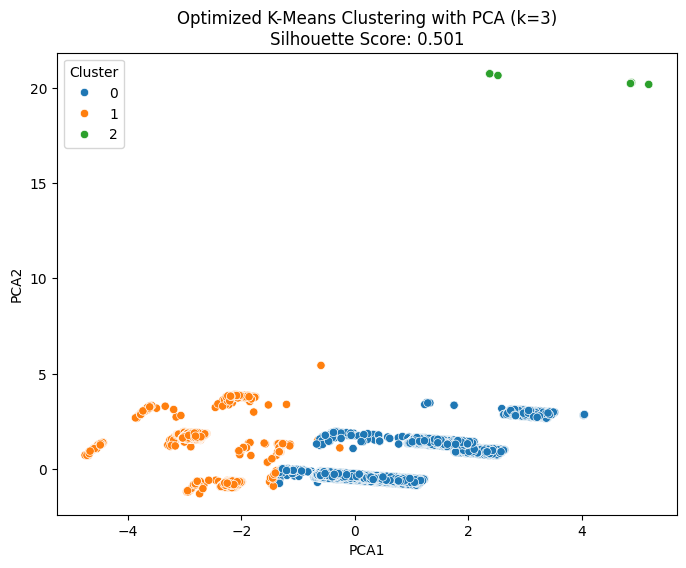

In [23]:


# ========== Chargement ==========
# df1 = filtered_data.copy()
df1 = df.copy()
# ========== Fonctions pour colonnes binaires ==========
def contains_pattern(text, pattern):
    if pd.isna(text):
        return 0
    return 1 if re.search(pattern, str(text), re.IGNORECASE) else 0

sea_pattern = r'\b(mer|vue sur mer|bord de mer|plage|front de mer|près de la mer|proche de la mer)\b'
city_pattern = r'\b(centre-ville|zone urbaine|zone touristique|proche du centre|résidentiel|commerces)\b'
infra_pattern = r'\b(électricité|eau|gaz|internet|assainissement|voirie|forage|puit|fibre optique|téléphone)\b'
agri_pattern = r'\b(oliviers?|vignes?|fruitiers?|verger|plantation|jardin|cultures|agrumes|blé|palmiers?)\b'
feat_pattern = r'\b(bâtiment|maison|titre foncier|villa|garage|clôture|piscine|dépôt|serre|atelier|hangar|papiers)\b'

df1['Near_Sea'] = df1['Proximité'].apply(lambda x: contains_pattern(x, sea_pattern))
df1['Near_City'] = df1['Proximité'].apply(lambda x: contains_pattern(x, city_pattern))
df1['Has_Infrastructure'] = df1['Infrastructure'].apply(lambda x: contains_pattern(x, infra_pattern))
df1['Has_Agriculture'] = df1['Type_Agriculture'].apply(lambda x: contains_pattern(x, agri_pattern))
df1['Has_Additional_Features'] = df1['Additional_Features'].apply(lambda x: contains_pattern(x, feat_pattern))

# ========== Suppression des outliers ==========
df1['z_prix'] = zscore(df1['Prix_m2'])
df1['z_taille'] = zscore(df1['Taille_m2'])
df1 = df1[(df1['z_prix'].abs() < 3) & (df1['z_taille'].abs() < 3)]
df1.drop(columns=['z_prix', 'z_taille'], inplace=True)

# ========== Préparation des features ==========
features = df1[['Prix_m2', 'Taille_m2', 'Near_Sea', 'Near_City',
                'Has_Infrastructure', 'Has_Agriculture', 'Has_Additional_Features']].dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# ========== PCA avant clustering ==========
pca_cluster = PCA(n_components=0.95)
features_pca = pca_cluster.fit_transform(scaled_features)

# ========== Recherche du meilleur k ==========
best_k = 2
best_score = -1
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_pca)
    score = silhouette_score(features_pca, labels)
    if score > best_score:
        best_k = k
        best_score = score

# ========== Clustering final ==========
kmeans = KMeans(n_clusters=best_k, random_state=42)
df1['Cluster'] = kmeans.fit_predict(features_pca)

# ========== PCA pour visualisation ==========
pca_visu = PCA(n_components=2)
reduced_features = pca_visu.fit_transform(scaled_features)
df1['PCA1'] = reduced_features[:, 0]
df1['PCA2'] = reduced_features[:, 1]

# ========== Visualisation ==========
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df1, palette='tab10')
plt.title(f'Optimized K-Means Clustering with PCA (k={best_k})\nSilhouette Score: {best_score:.3f}')
plt.show()

In [ ]:
# df1.to_csv('/content/tn_lands_prices.csv', index=False)


## 🗺 **5.2. Geographical Mapping**

In [25]:
# # Initialiser le géocodeur
# geolocator = Nominatim(user_agent="tunisia_map")

# # Créer une fonction pour géocoder une localité
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# # Ajouter les coordonnées au DataFrame
# df1['Location'] = df1['Localité'].apply(geocode)
# df1['Latitude'] = df1['Location'].apply(lambda loc: loc.latitude if loc else None)
# df1['Longitude'] = df1['Location'].apply(lambda loc: loc.longitude if loc else None)

# # Supprimer les lignes sans coordonnées
# df1.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [ ]:
# # Créer une carte centrée sur la Tunisie
# tunisia_map = folium.Map(location=[34, 9], zoom_start=7)

# # Ajouter des marqueurs pour chaque terrain
# for idx, row in df1.iterrows():
#     folium.Marker(
#         location=[row['Latitude'], row['Longitude']],  # Utiliser les colonnes Latitude et Longitude
#         popup=f"Prix: {row['Prix']}, Taille: {row['Taille_m2']} m²",
#         icon=folium.Icon(color='blue' if row['Cluster'] == 0 else 'green')
#     ).add_to(tunisia_map)

# # Enregistrer la carte
# tunisia_map.save('lands_map.html')

# 📊 **6. Business Insights**

---

## 💰 **6.1. Investment Opportunities**
- Identify high-value lands based on location, price trends, and features.  
- Detect emerging areas for agricultural investment.  
- Compare price-per-m² across different regions.
---

## ⚠️ **6.2. Risk Assessment**
- Assess the stability of land prices over time.  
- Identify regions with fluctuating or declining land values.  
- Evaluate risks related to infrastructure, climate, and accessibility.  

In [28]:
# Make sure it has 'Cluster' and 'Prix_m2'
if 'Cluster' not in df1.columns:
    raise ValueError("The file does not have the 'Cluster' column. Please run clustering before.")

# Group by Cluster and calculate the average Prix_m2
cluster_summary = df1.groupby('Cluster')['Prix_m2'].mean().sort_values(ascending=False)

# Find the cluster with the highest and lowest average price
highest_value_cluster = cluster_summary.idxmax()
lowest_value_cluster = cluster_summary.idxmin()

highest_value_mean = cluster_summary.max()
lowest_value_mean = cluster_summary.min()

(cluster_summary, highest_value_cluster, highest_value_mean, lowest_value_cluster, lowest_value_mean)


(Cluster
 2    434.510243
 0    322.196852
 1     87.387236
 Name: Prix_m2, dtype: float64,
 np.int32(2),
 434.51024327784893,
 np.int32(1),
 87.38723642848845)

In [29]:
# Trouver le cluster avec le prix moyen le plus élevé (haute valeur)
cluster_means = df1.groupby('Cluster')['Prix_m2'].mean()
high_value_cluster = cluster_means.idxmax()

# Trouver le cluster avec le prix moyen le plus bas (faible valeur)
low_value_cluster = cluster_means.idxmin()

# Filtrer les données pour ces clusters
high_value_lands = df1[df1['Cluster'] == high_value_cluster]
low_value_lands = df1[df1['Cluster'] == low_value_cluster]

print("High-value cluster:", high_value_cluster)
print(high_value_lands[['Gouvernorat', 'Délégation', 'Prix_m2', 'Taille_m2']])

print("\nLow-value cluster:", low_value_cluster)
print(low_value_lands[['Gouvernorat', 'Délégation', 'Prix_m2', 'Taille_m2']])

High-value cluster: 2
    Gouvernorat     Délégation     Prix_m2  Taille_m2
390      Nabeul        Kélibia  600.000000     2100.0
394      Nabeul        Kélibia  600.000000     1600.0
408      Nabeul        Kélibia  600.000000     3700.0
474    Medenine     Houmt Souk  128.040973     7029.0
477      Nabeul        Kélibia  660.000000     3000.0
480    Medenine  Djerba Midoun  128.040973     7029.0
508     Manouba     Oued Ellil  160.000000    10000.0
522      Nabeul        Kélibia  600.000000     4180.0

Low-value cluster: 1
      Gouvernorat Délégation     Prix_m2  Taille_m2
2        Zaghouan    El Fahs  114.666667     7500.0
3          Sousse     Akouda   80.000000     3366.0
7          Nabeul   Hammamet   12.500000     8000.0
8          Sousse     Akouda   94.444444     9000.0
14         Sousse     Akouda  105.000000     3850.0
...           ...        ...         ...        ...
18844   Tataouine     Remada   60.660000     2937.0
18851   Tataouine     Remada   94.820000    11410.0
18

In [30]:
# Statistiques pour le cluster de haute valeur
print("High-value cluster statistics:")
print(high_value_lands[['Prix_m2', 'Taille_m2']].describe())

# Statistiques pour le cluster de faible valeur
print("\nLow-value cluster statistics:")
print(low_value_lands[['Prix_m2', 'Taille_m2']].describe())

High-value cluster statistics:
          Prix_m2     Taille_m2
count    8.000000      8.000000
mean   434.510243   4829.750000
std    245.995287   2911.411084
min    128.040973   1600.000000
25%    152.010243   2775.000000
50%    600.000000   3940.000000
75%    600.000000   7029.000000
max    660.000000  10000.000000

Low-value cluster statistics:
           Prix_m2     Taille_m2
count  2763.000000   2763.000000
mean     87.387236  10983.495476
std      38.745803   6691.316883
min      10.000000   1502.000000
25%      58.265000   5759.500000
50%      88.120000  10000.000000
75%     120.000000  15437.000000
max     312.500000  42930.000000


---

# 📈 **7. Visualization**

<ipython-input-31-59b005f23f8f>:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


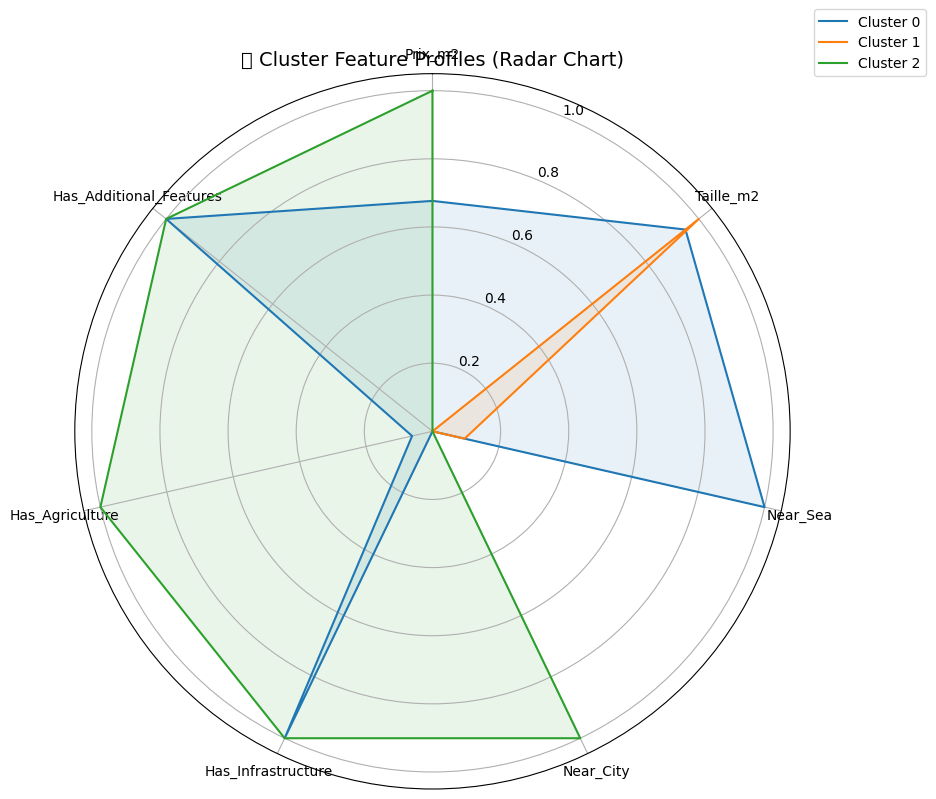

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Recompute the cluster means
cluster_means = df1.groupby("Cluster")[['Prix_m2', 'Taille_m2', 'Near_Sea', 'Near_City',
                                        'Has_Infrastructure', 'Has_Agriculture', 'Has_Additional_Features']].mean()

# Normalize for radar chart visualization
normalized_means = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())
features = normalized_means.columns.tolist()
num_vars = len(features)

# Create angle for each feature
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Prepare the radar chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Plot each cluster
for cluster in normalized_means.index:
    values = normalized_means.loc[cluster].tolist()
    values += values[:1]  # repeat first value to close the loop
    ax.plot(angles, values, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)

# Add labels and formatting
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), features)
plt.title('📊 Cluster Feature Profiles (Radar Chart)', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


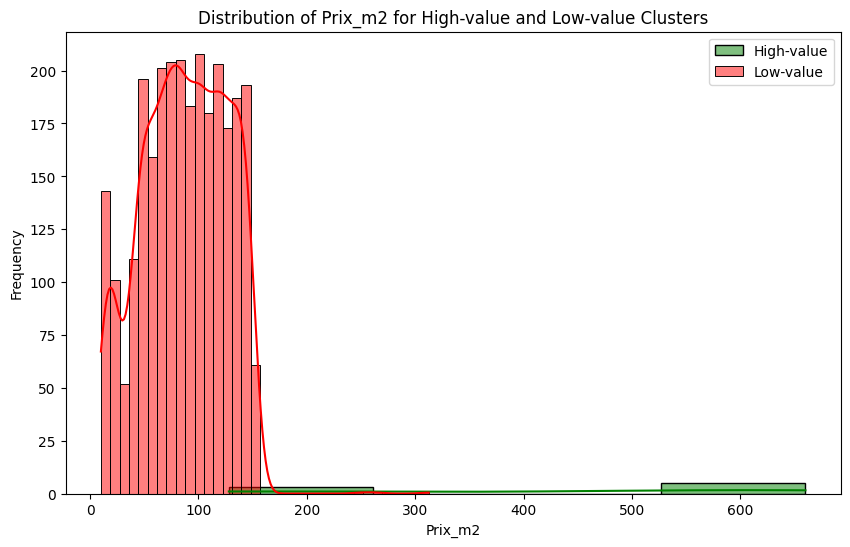

In [32]:
# Distribution des Prix_m2 pour les clusters de haute et faible valeur
plt.figure(figsize=(10, 6))
sns.histplot(high_value_lands['Prix_m2'], color='green', label='High-value', kde=True)
sns.histplot(low_value_lands['Prix_m2'], color='red', label='Low-value', kde=True)
plt.xlabel('Prix_m2')
plt.ylabel('Frequency')
plt.title('Distribution of Prix_m2 for High-value and Low-value Clusters')
plt.legend()
plt.show()

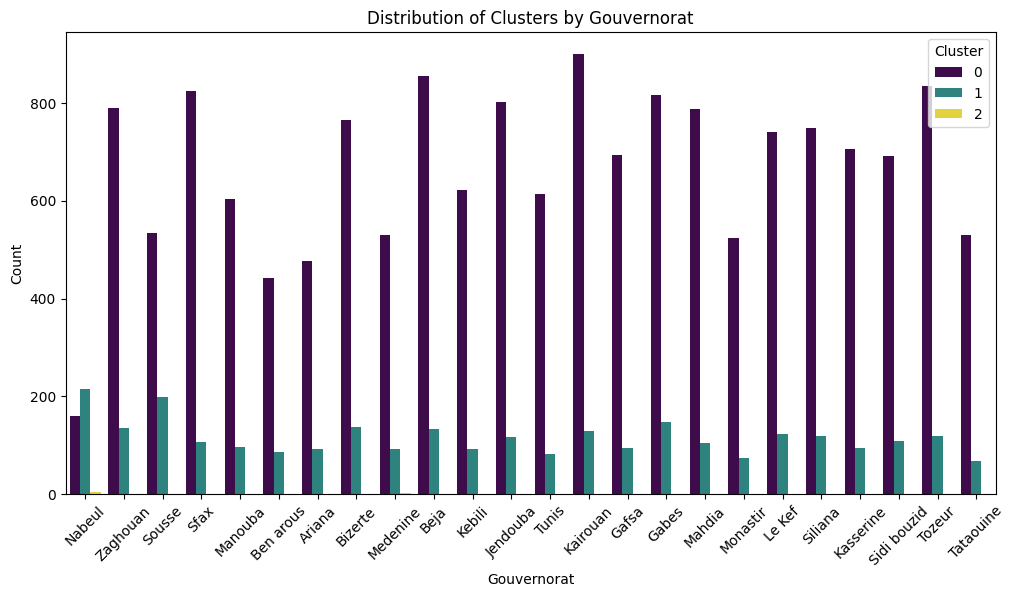

In [33]:
# Répartition des clusters par Gouvernorat
plt.figure(figsize=(12, 6))
sns.countplot(x='Gouvernorat', hue='Cluster', data=df1, palette='viridis')
plt.xlabel('Gouvernorat')
plt.ylabel('Count')
plt.title('Distribution of Clusters by Gouvernorat')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

<ipython-input-34-aac639ae416a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Prix_m2', data=df1, palette='viridis')


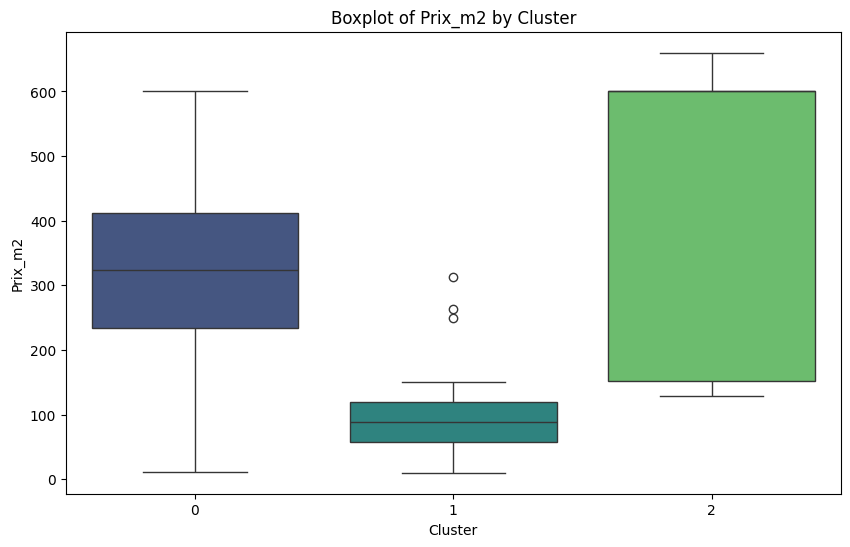

In [34]:
# Boxplot des Prix_m2 par Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Prix_m2', data=df1, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Prix_m2')
plt.title('Boxplot of Prix_m2 by Cluster')
plt.show()

---

# 🤖 **8. Modeling**

In [35]:
# 🚀 Code complet pour entraîner, optimiser et comparer plusieurs modèles de régression sur Prix/m²

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ========== 1. Chargement de tes données ==========

# Remplace ici par le chemin correct si besoin
data = df1.copy()

# Vérifie que ces colonnes existent
needed_cols = ['Prix_m2', 'Taille_m2', 'Near_Sea', 'Near_City',
               'Has_Infrastructure', 'Has_Agriculture', 'Has_Additional_Features']

for col in needed_cols:
    if col not in data.columns:
        raise ValueError(f"Missing column: {col}")

X = data[needed_cols[1:]]  # Features
y = data['Prix_m2']         # Target

# ========== 2. Séparation Training/Test ==========

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ========== 3. Standardisation ==========

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========== 4. Définir les modèles avec GridSearchCV ==========

# Linear Regression
linreg = LinearRegression()

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

# XGBoost
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1]
}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6]
}
gbr_grid = GridSearchCV(gbr, gbr_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

# ========== 5. Entraîner tous les modèles ==========

models = {
    'Linear Regression': linreg,
    'Random Forest': rf_grid,
    'XGBoost': xgb_grid,
    'Gradient Boosting': gbr_grid
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    # Utiliser le meilleur modèle si GridSearch
    if hasattr(model, 'best_estimator_'):
        best_model = model.best_estimator_
    else:
        best_model = model

    y_pred = best_model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# ========== 6. Résultats finaux ==========

results_df = pd.DataFrame(results).sort_values(by='RMSE')

print("✅ Résultats de la comparaison entre modèles :")
print(results_df)


✅ Résultats de la comparaison entre modèles :
               Model       RMSE        MAE  R2 Score
1      Random Forest  91.755040  73.490768  0.490343
2            XGBoost  91.947514  73.833966  0.488203
3  Gradient Boosting  91.983183  74.040894  0.487805
0  Linear Regression  94.217335  75.854131  0.462622


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# 📂 Charger tes données (supposons déjà df2 chargé)
# df2 = pd.read_csv('balanced_data.csv')

# 🛠 Séparer Features et Target
X = df2.drop(columns=["Prix", "Prix_m2", "Taille"], errors='ignore')
y = df2["Prix_m2"]  # 🚀 Target = Prix au m² maintenant !

# 🔍 Identifier colonnes
cat_features = X.select_dtypes(include=["object"]).columns.tolist()
num_features = X.select_dtypes(include=["float64", "int64"]).columns.tolist()

# 🔨 Construire le préprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features)
    ]
)

# ✂️ Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📦 Liste des modèles
models_corrected = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1, max_iter=10000),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "XGBoost": XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, verbosity=0)
}

results_final = []

# 🔁 Boucle sur les modèles
for name, model in models_corrected.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_final.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2 Score": round(r2, 3)
    })

# 📈 Résultats finaux
results_df_final = pd.DataFrame(results_final).sort_values(by="R2 Score", ascending=False)
print(results_df_final)


               Model    MAE   RMSE  R2 Score
4            XGBoost  19.23  24.26     0.965
2   Ridge Regression  19.88  24.97     0.963
1   Lasso Regression  19.99  25.38     0.962
0  Linear Regression  19.97  25.66     0.961
3      Decision Tree  19.46  25.86     0.960


                Model  Fold  R2 Score
0   Linear Regression     1     0.961
1   Linear Regression     2     0.961
2   Linear Regression     3     0.958
3   Linear Regression     4     0.960
4   Linear Regression     5     0.959
5    Lasso Regression     1     0.962
6    Lasso Regression     2     0.949
7    Lasso Regression     3     0.957
8    Lasso Regression     4     0.953
9    Lasso Regression     5     0.954
10   Ridge Regression     1     0.963
11   Ridge Regression     2     0.962
12   Ridge Regression     3     0.961
13   Ridge Regression     4     0.960
14   Ridge Regression     5     0.960
15      Decision Tree     1     0.960
16      Decision Tree     2     0.958
17      Decision Tree     3     0.963
18      Decision Tree     4     0.961
19      Decision Tree     5     0.961
20            XGBoost     1     0.965
21            XGBoost     2     0.966
22            XGBoost     3     0.964
23            XGBoost     4     0.965
24            XGBoost     5     0.965


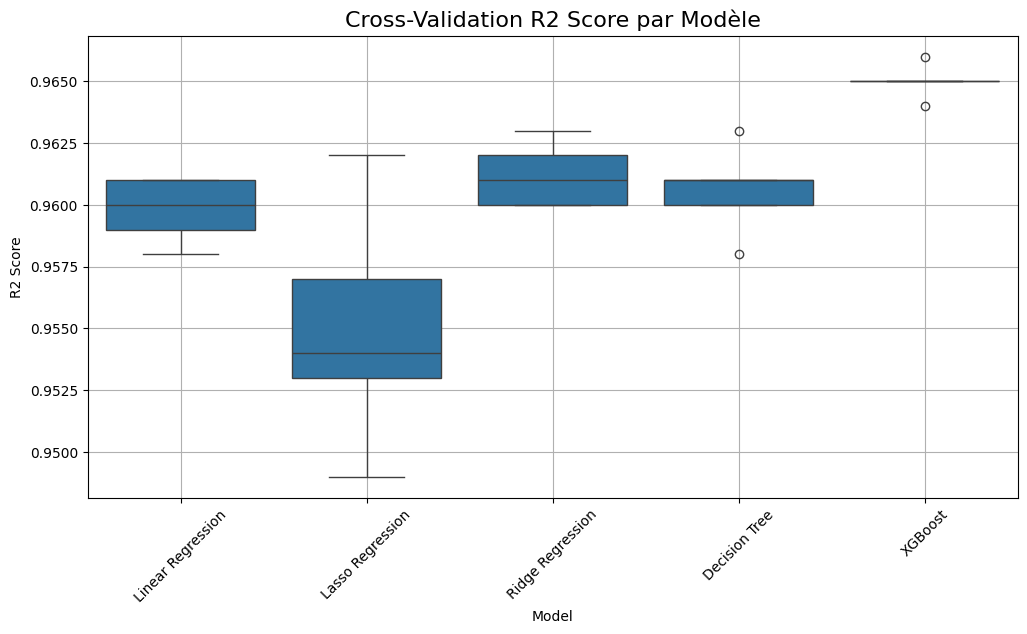

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold

# 📚 Définir le KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 📦 Liste des modèles
models_corrected = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1, max_iter=10000),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "XGBoost": XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, verbosity=0)
}

results_cv_all = []

# 🔁 Boucle sur les modèles
for name, model in models_corrected.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    # ⚡ Cross Validation
    scores_r2 = cross_val_score(pipeline, X, y, cv=kf, scoring="r2")

    for fold_idx, score in enumerate(scores_r2):
        results_cv_all.append({
            "Model": name,
            "Fold": fold_idx + 1,
            "R2 Score": round(score, 3)
        })

# 📈 Résultats détaillés
results_cv_all_df = pd.DataFrame(results_cv_all)
print(results_cv_all_df)

# 📊 Visualisation : Boxplot Cross-Validation
plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="R2 Score", data=results_cv_all_df)
plt.title("Cross-Validation R2 Score par Modèle", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [38]:
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_overfit = []

for name, model in models_corrected.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    # 🎯 Cross-validation sur le train
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring="r2")

    # 🎯 Fit sur tout le train
    pipeline.fit(X_train, y_train)

    # 🎯 Score sur test
    test_score = r2_score(y_test, pipeline.predict(X_test))

    results_overfit.append({
        "Model": name,
        "CV R2 Mean (Train)": round(cv_scores.mean(), 3),
        "Test R2": round(test_score, 3),
        "Gap (Test - CV)": round(test_score - cv_scores.mean(), 3)
    })

# 📈 Résultats
results_overfit_df = pd.DataFrame(results_overfit).sort_values(by="Test R2", ascending=False)
print(results_overfit_df)


               Model  CV R2 Mean (Train)  Test R2  Gap (Test - CV)
4            XGBoost               0.962    0.965            0.003
2   Ridge Regression               0.961    0.963            0.002
1   Lasso Regression               0.953    0.962            0.009
0  Linear Regression               0.960    0.961            0.001
3      Decision Tree               0.956    0.960            0.005


In [39]:
# # Sauvegarder le meilleur modèle XGBoost
# joblib.dump(models['XGBoost'].best_estimator_, 'xgboost_price_model.pkl')
# print("✅ Modèle XGBoost sauvegardé sous 'xgboost_pricemodel.pkl'")


# # Sauvegarde du modèle dans Drive
# joblib.dump(model, '/content/drive/MyDrive/xgboost_price_model.pkl')
# print("✅ Modèle sauvegardé dans Drive sous 'MyDrive/xgboost_pricemodel.pkl'")


✅ Modèle XGBoost sauvegardé sous 'xgboost_pricemodel.pkl'
✅ Modèle sauvegardé dans Drive sous 'MyDrive/xgboost_pricemodel.pkl'


In [ ]:
# 📦 Importations
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📂 1. Charger ton dataset
# Suppose que ton DataFrame s'appelle df2

# 🛠 2. Séparer Features (X) et Target (y)
X = df2.drop(columns=["Prix", "Prix_m2", "Taille", "Date", "Localité"], errors='ignore')
y = df2["Prix_m2"]

# 🔍 3. Identifier colonnes
cat_features = X.select_dtypes(include=["object"]).columns.tolist()
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("✅ Catégorielles :", cat_features)
print("✅ Numériques :", num_features)

# 🏗️ 4. Construire le Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features)
    ]
)

# 🚀 5. Construire le Pipeline complet
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        verbosity=0
    ))
])

# 📚 6. Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 7. Entraînement du Pipeline
pipeline.fit(X_train, y_train)

# 🛠️ 8. Évaluation rapide
y_pred = pipeline.predict(X_test)
print("\n🎯 Évaluation rapide :")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R2 Score : {r2_score(y_test, y_pred):.3f}")

# 💾 9. Sauvegarder le Pipeline complet
joblib.dump(pipeline, '/content/drive/MyDrive/xgboost_model2.pkl')
print("✅ Pipeline sauvegardé : '/content/drive/MyDrive/xgboost_model2.pkl'")


✅ Catégorielles : ['Gouvernorat', 'Délégation', 'Proximité', 'Infrastructure', 'Type_Agriculture', 'Additional_Features']
✅ Numériques : ['Taille_m2']

🎯 Évaluation rapide :
MAE : 19.31
RMSE : 24.41
R2 Score : 0.965
✅ Pipeline sauvegardé : '/content/drive/MyDrive/xgboost_model2.pkl'


In [41]:
# Charger le nouveau pipeline
pipeline = joblib.load('/content/drive/MyDrive/xgboost_model2.pkl')

# Créer un terrain sans Date ni Localité
nouveau_terrain = pd.DataFrame([{
    'Gouvernorat': "Tunis",
    'Délégation': "Sidi Hassine",
    'Proximité': "aucun",
    'Infrastructure': "aucun",
    'Type_Agriculture': "aucun",
    'Additional_Features': "aucun",
    'Taille_m2': 10000
}])

# Prédiction directe
prix_m2_prevu = pipeline.predict(nouveau_terrain)[0]
prix_total_prevu = prix_m2_prevu * nouveau_terrain["Taille_m2"].values[0]

print(f"🏡 Prix estimé par m² : {prix_m2_prevu:.2f} TND/m²")
print(f"🏡 Prix total estimé : {prix_total_prevu:.2f} TND")



🏡 Prix estimé par m² : 373.42 TND/m²
🏡 Prix total estimé : 3734211.12 TND


In [42]:
# Charger le nouveau pipeline
pipeline = joblib.load('/content/drive/MyDrive/xgboost_model1.pkl')

# Créer un terrain sans Date ni Localité
nouveau_terrain = pd.DataFrame([{
    'Gouvernorat': "Nabeul",
    'Délégation': "Kelibia",
    'Proximité': "front de mer",
    'Infrastructure': "sondage, eau, électricité, gaz, téléphone",
    'Type_Agriculture': "Vignes",
    'Additional_Features': "titre foncier",
    'Taille_m2': 2100
}])

# Prédiction directe
prix_m2_prevu = pipeline.predict(nouveau_terrain)[0]
prix_total_prevu = prix_m2_prevu * nouveau_terrain["Taille_m2"].values[0]

print(f"🏡 Prix estimé par m² : {prix_m2_prevu:.2f} TND/m²")
print(f"🏡 Prix total estimé : {prix_total_prevu:.2f} TND")



🏡 Prix estimé par m² : 593.81 TND/m²
🏡 Prix total estimé : 1247003.30 TND


In [43]:
import pandas as pd
import joblib

# 1. Charger ton pipeline sauvegardé
pipeline = joblib.load('/content/drive/MyDrive/xgboost_model1.pkl')  # adapte ton chemin si besoin

# 2. Créer plusieurs nouveaux terrains à prédire
terrains_a_predire = pd.DataFrame([
    {
        'Gouvernorat': "Tunis",
        'Délégation': "Sidi Hassine",
        'Proximité': "proche du centre",
        'Infrastructure': "eau, électricité",
        'Type_Agriculture': "aucun",
        'Additional_Features': "titre foncier",
        'Taille_m2': 1200
    },
    {
        'Gouvernorat': "Nabeul",
        'Délégation': "Hammamet",
        'Proximité': "bord de mer",
        'Infrastructure': "eau, électricité, gaz",
        'Type_Agriculture': "aucun",
        'Additional_Features': "villa",
        'Taille_m2': 800
    },
    {
        'Gouvernorat': "Sousse",
        'Délégation': "Akouda",
        'Proximité': "zone touristique",
        'Infrastructure': "eau, électricité",
        'Type_Agriculture': "aucun",
        'Additional_Features': "titre foncier",
        'Taille_m2': 1500
    }
])

# 3. Faire la prédiction
prix_m2_predits = pipeline.predict(terrains_a_predire)

# 4. Calculer aussi le prix total
terrains_a_predire["Prix_m2_estime"] = prix_m2_predits
terrains_a_predire["Prix_total_estime"] = terrains_a_predire["Prix_m2_estime"] * terrains_a_predire["Taille_m2"]

# 5. Afficher le résultat
print("🏡 Résultats des prédictions :")
print(terrains_a_predire[["Gouvernorat", "Délégation", "Taille_m2", "Prix_m2_estime", "Prix_total_estime"]])


🏡 Résultats des prédictions :
  Gouvernorat    Délégation  Taille_m2  Prix_m2_estime  Prix_total_estime
0       Tunis  Sidi Hassine       1200      326.695862      392035.034180
1      Nabeul      Hammamet        800      306.546967      245237.573242
2      Sousse        Akouda       1500      406.084717      609127.075195
